In [73]:
from google.colab import files

uploaded = files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('SalaryData_Test(1).csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [76]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [77]:
df.shape

(15060, 14)

In [78]:
df.values

array([[25, ' Private', ' 11th', ..., 40, ' United-States', ' <=50K'],
       [38, ' Private', ' HS-grad', ..., 50, ' United-States', ' <=50K'],
       [28, ' Local-gov', ' Assoc-acdm', ..., 40, ' United-States',
        ' >50K'],
       ...,
       [38, ' Private', ' Bachelors', ..., 50, ' United-States',
        ' <=50K'],
       [44, ' Private', ' Bachelors', ..., 40, ' United-States',
        ' <=50K'],
       [35, ' Self-emp-inc', ' Bachelors', ..., 60, ' United-States',
        ' >50K']], dtype=object)

In [79]:
df.age.value_counts()

,count
age,
35,444
33,442
36,431
31,423
38,420
...,...
85,2
88,2
89,1


In [80]:
df.age.values

array([25, 38, 28, ..., 38, 44, 35])

In [81]:
df['Salary'].min(), df['Salary'].max()

(' <=50K', ' >50K')

In [82]:
df.dtypes

,0
age,int64
workclass,object
education,object
educationno,int64
maritalstatus,object
occupation,object
relationship,object
race,object
sex,object
capitalgain,int64


In [83]:
df_male = df[df['sex'] == 'Male']

In [84]:
df_male['Salary'].mean()

nan

In [85]:
df_female = df[df['sex'] == 'Female']

In [86]:
df_female['Salary'].mean()

nan

In [87]:
# Replace '<=50K' with 0 and '>50K' with 1 in the 'Salary' column
# The .str.strip() method is used to remove leading/trailing spaces
df['Salary'] = df['Salary'].str.strip().replace({'<=50K': 0, '>50K': 1})

# Now you can calculate the mean
df.groupby('sex')['Salary'].mean()

<ipython-input-87-6cdbc7882209>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Salary'] = df['Salary'].str.strip().replace({'<=50K': 0, '>50K': 1})


,Salary
sex,
Female,0.113373
Male,0.309747


In [88]:
df.groupby('sex')['Salary'].mean()

,Salary
sex,
Female,0.113373
Male,0.309747


In [89]:
df.groupby(['educationno','sex'])[['Salary','hoursperweek']].mean().sort_values('Salary',ascending=False)

,,Salary,hoursperweek
educationno,sex,,
15,Male,0.805825,48.645631
16,Male,0.739437,47.084507
14,Male,0.629005,45.416526
15,Female,0.540541,43.378378
16,Female,0.518519,40.851852
13,Male,0.511059,44.016880
12,Male,0.372168,44.291262
14,Female,0.346939,39.595238
11,Male,0.310185,43.810185


In [90]:
pivot_df = df.pivot_table(columns=['sex','maritalstatus'], values=['Salary'], aggfunc='mean')
pivot_df.head()

sex              Female                                       \
maritalstatus  Divorced Married-AF-spouse Married-civ-spouse   
Salary         0.074045          0.444444           0.450205   

sex                                                                    \
maritalstatus Married-spouse-absent Never-married Separated   Widowed   
Salary                     0.082353      0.041345  0.039568  0.059829   

sex                Male                                       \
maritalstatus  Divorced Married-AF-spouse Married-civ-spouse   
Salary         0.133011               0.0           0.453093   

sex                                                                   
maritalstatus Married-spouse-absent Never-married Separated  Widowed  
Salary                     0.164948      0.052415  0.113402  0.20202

In [91]:
df.dtypes

,0
age,int64
workclass,object
education,object
educationno,int64
maritalstatus,object
occupation,object
relationship,object
race,object
sex,object
capitalgain,int64


In [92]:
df['native'] = df['native'].astype('string')

In [93]:
df.dtypes

,0
age,int64
workclass,object
education,object
educationno,int64
maritalstatus,object
occupation,object
relationship,object
race,object
sex,object
capitalgain,int64


In [94]:
df.nunique()

,0
age,73
workclass,7
education,16
educationno,16
maritalstatus,7
occupation,14
relationship,6
race,5
sex,2
capitalgain,110


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  string
 13  Salary         15060 non-null  int64 
dtypes: int64(6), object(7), string(1)
memory usage: 1.6+ MB


In [96]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594,0.245684
std,13.380676,2.558727,7703.181842,406.283245,12.062831,0.430506
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000,1.000000


In [97]:
df.describe(include='object')

,workclass,education,maritalstatus,occupation,relationship,race,sex
count,15060,15060,15060,15060,15060,15060,15060
unique,7,16,7,14,6,5,2
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male
freq,11021,4943,6990,1992,6203,12970,10147


In [98]:
df.describe(exclude='object')

,age,educationno,capitalgain,capitalloss,hoursperweek,native,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060,15060.000000
unique,NaN,NaN,NaN,NaN,NaN,40,NaN
top,NaN,NaN,NaN,NaN,NaN,United-States,NaN
freq,NaN,NaN,NaN,NaN,NaN,13788,NaN
mean,38.768327,10.112749,1120.301594,89.041899,40.951594,NaN,0.245684
std,13.380676,2.558727,7703.181842,406.283245,12.062831,NaN,0.430506
min,17.000000,1.000000,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000,NaN,0.000000


<Axes: xlabel='age', ylabel='Salary'>

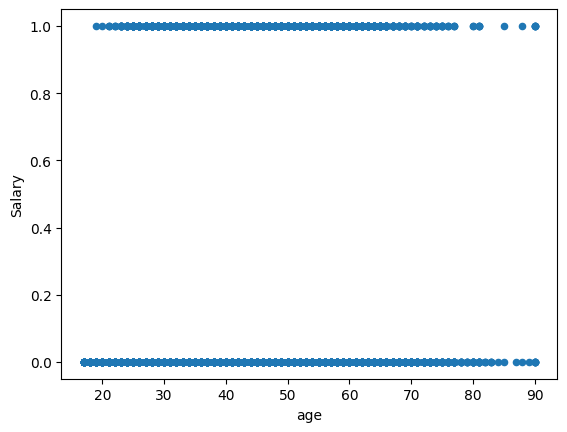

In [99]:
df.plot(x='age',y='Salary',kind='scatter')

In [105]:
df[['age','Salary']].corr()

,age,Salary
age,1.000000,0.227469
Salary,0.227469,1.000000


In [108]:
df_salary_corr = df[['age','Salary','hoursperweek']].corr()
df_salary_corr

,age,Salary,hoursperweek
age,1.000000,0.227469,0.102758
Salary,0.227469,1.000000,0.222665
hoursperweek,0.102758,0.222665,1.000000


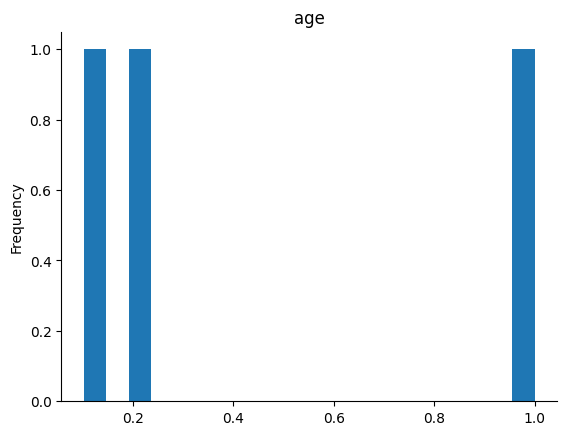

In [110]:
# @title age

from matplotlib import pyplot as plt
df_salary_corr['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

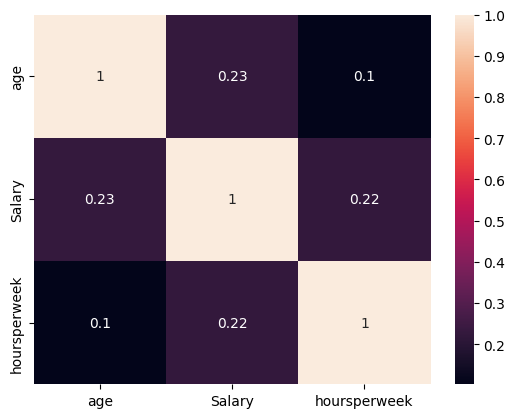

In [109]:
import seaborn as sns
sns.heatmap(df_salary_corr,annot=True)

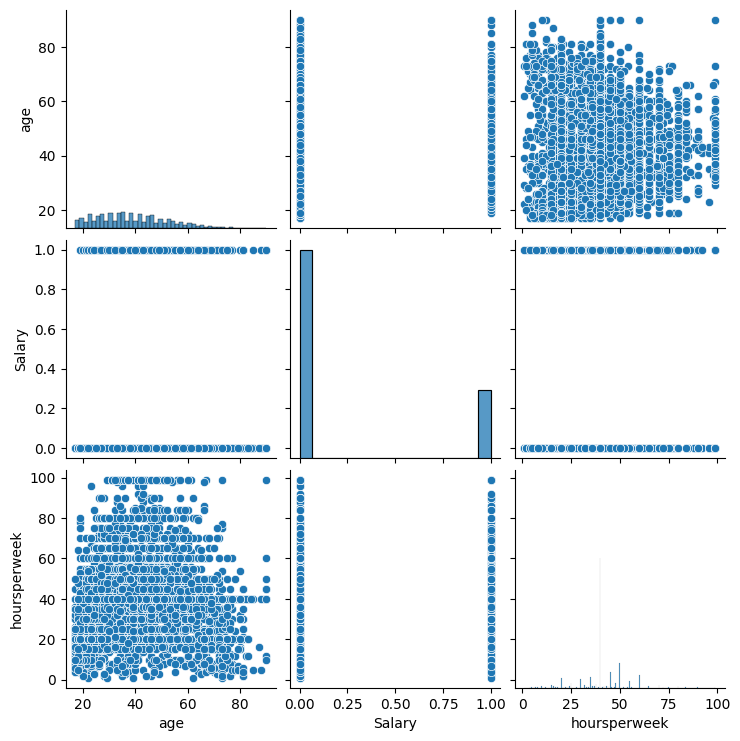

In [112]:
sns.pairplot(df[['age','Salary','hoursperweek']])

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [7]:
data = pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
data['Survived'].sum()

342

In [11]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [12]:
ratio = sum(data['Survived'])/len(data['Survived'])
ratio

0.3838383838383838

In [13]:
mean = data['Age'].mean()
mean

29.69911764705882

In [14]:
data['Age'] = data['Age'].fillna(mean)  # Fill missing values in the original DataFrame
data['Age'].isnull().sum()             # Check for null values in the 'Age' column of the original dataframe

0

In [15]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Basics Statistics

In [5]:
age = [24,24,23,21,21,36,38, 27,44,28]

In [6]:
import pandas as pd
age_srs = pd.Series(age)
age_srs

,0
0,24
1,24
2,23
3,21
4,21
5,36
6,38
7,27
8,44
9,28


In [16]:
age_srs.min(), age_srs.max(), age_srs.sum(), age_srs.mean(), age_srs.median()

(21, 44, 286, 28.6, 25.5)

In [17]:
age_srs.mode()

,0
0,21
1,24


In [18]:
age_mean = age_srs.mean()
age_mean

28.6

In [19]:
age_df = pd.DataFrame(age_srs)
age_df

,0
0,24
1,24
2,23
3,21
4,21
5,36
6,38
7,27
8,44
9,28


In [20]:
age_df['x-xbar^2'] = (age_df[0] - age_mean)**2
age_df

,0,x-xbar^2
0,24,21.16
1,24,21.16
2,23,31.36
3,21,57.76
4,21,57.76
5,36,54.76
6,38,88.36
7,27,2.56
8,44,237.16
9,28,0.36


In [21]:
avg_age = sum(age_df['x-xbar^2'])/9
avg_age

63.599999999999994

## Standard Deviation

In [22]:
import numpy as np
np.sqrt(age_df['x-xbar^2'].mean())

7.565712127751095

In [23]:
age_df[0].var(), age_df[0].std()

(63.599999999999994, 7.974960814950754)

In [24]:
# Quartile
q1 = age_df[0].quantile(0.25)
q2 = age_df[0].quantile(0.5)
q3 = age_df[0].quantile(0.75)
q1, q2, q3

(23.25, 25.5, 34.0)

In [25]:
qd = q3-q1
print(qd)

10.75


<Axes: ylabel='Density'>

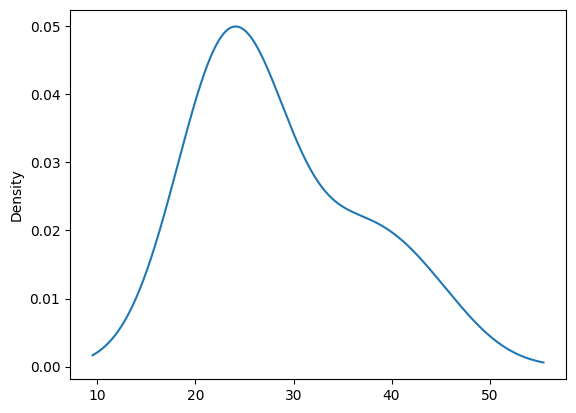

In [26]:
age_df[0].plot(kind='kde')

<Axes: ylabel='Frequency'>

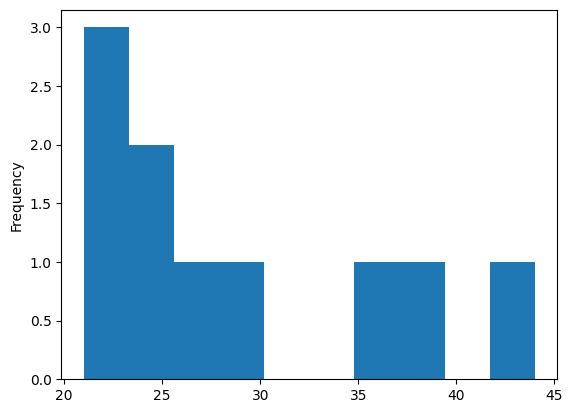

In [27]:
age_df[0].plot(kind='hist', bins=10)

<Axes: >

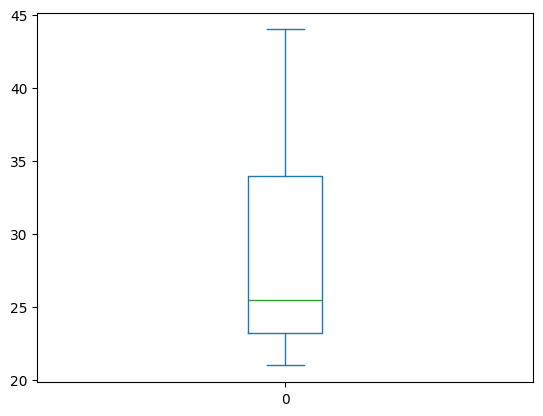

In [28]:
age_df[0].plot(kind='box')

<Axes: >

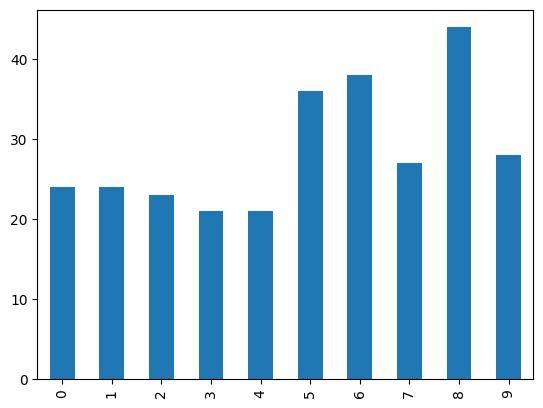

In [29]:
age_df[0].plot(kind='bar')

In [30]:
age_df[0].kurt()

-0.2596458661784409

In [31]:
age_df[0].kurtosis()

-0.2596458661784409

In [32]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [33]:
ss = pd.read_csv('SampleSuperstore.csv')
ss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [34]:
ss.dtypes

,0
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
Sales,float64


In [35]:
ss.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [36]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [37]:
ss.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [38]:
ss.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [39]:
ss['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


In [40]:
# average sales info by categories

In [41]:
orders = ss
orders.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [42]:
orders_cat_sales = ss.groupby('Category')['Sales'].mean().sort_values()

<Axes: ylabel='Category'>

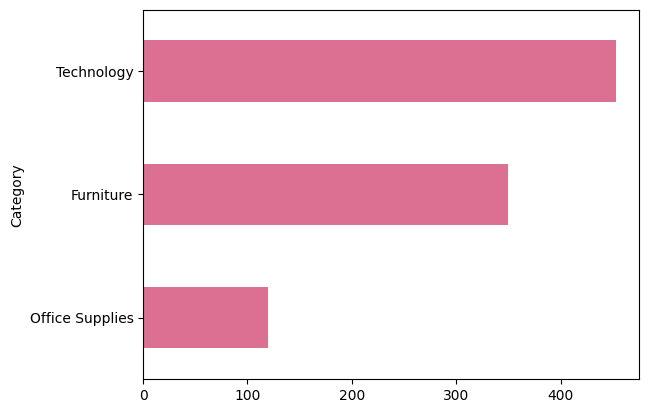

In [43]:
orders_cat_sales.plot(kind='barh',color='palevioletred')

In [44]:
orders_tech = orders[orders['Category'] == 'Technology']
orders_tech.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
11,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,911.424,4,0.2,68.3568
19,Second Class,Consumer,United States,San Francisco,California,94109,West,Technology,Phones,213.480,3,0.2,16.0110
26,Second Class,Consumer,United States,Los Angeles,California,90049,West,Technology,Accessories,90.570,3,0.0,11.7741
35,First Class,Corporate,United States,Richardson,Texas,75080,Central,Technology,Phones,1097.544,7,0.2,123.4737


In [45]:
orders_tech['Sub-Category'].value_counts()

,count
Sub-Category,
Phones,889
Accessories,775
Machines,115
Copiers,68


In [46]:
tech_sub = orders_tech.groupby('Sub-Category')['Sales'].mean().sort_values()

<Axes: ylabel='Sub-Category'>

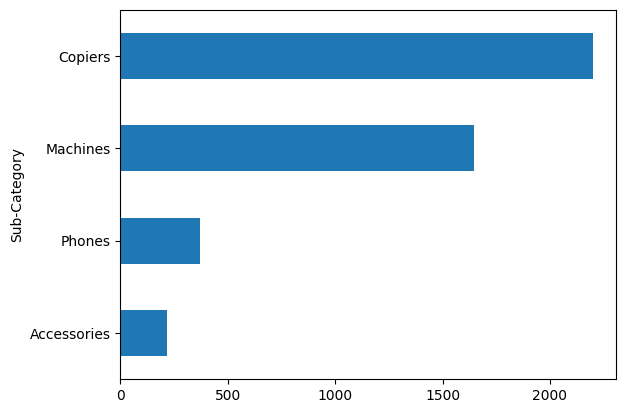

In [47]:
tech_sub.plot(kind='barh')

In [48]:
tech_profit = orders_tech.groupby('Sub-Category')[['Sales','Profit']].mean().sort_values(by = 'Profit',ascending=False)

In [49]:
tech_profit

,Sales,Profit
Sub-Category,,
Copiers,2198.941618,817.909190
Accessories,215.974604,54.111788
Phones,371.211534,50.073938
Machines,1645.553313,29.432669


<Axes: xlabel='Sub-Category'>

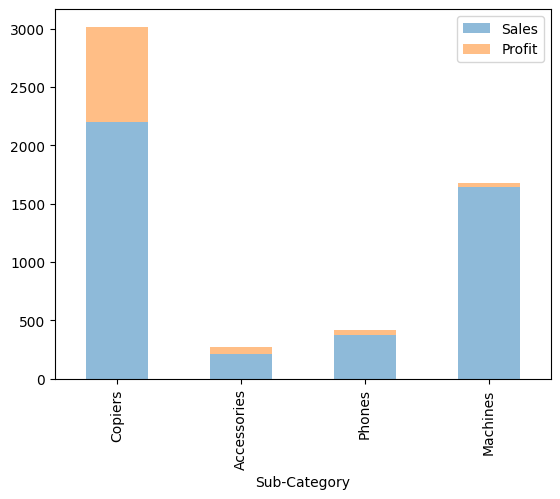

In [50]:
tech_profit.plot(kind='bar',stacked=True,alpha=0.5)

array([<Axes: title={'center': 'Sales'}, xlabel='Sub-Category'>,
       <Axes: title={'center': 'Profit'}, xlabel='Sub-Category'>],
      dtype=object)

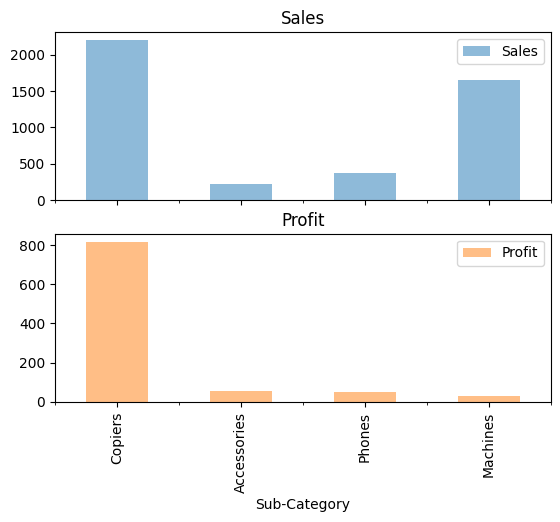

In [51]:
tech_profit.plot(kind='bar',subplots = True,alpha=0.5)

## data sistribution on sales

<Axes: ylabel='Frequency'>

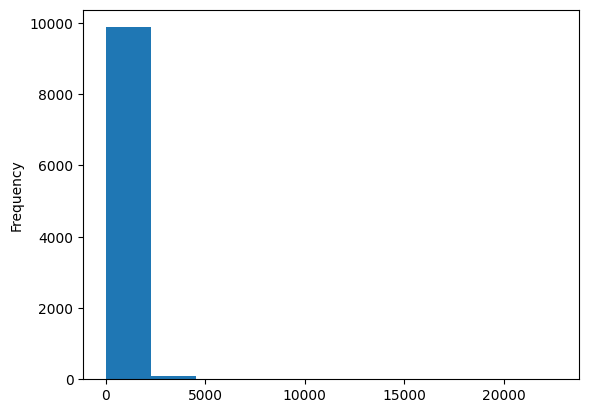

In [54]:
orders['Sales'].plot(kind='hist')

In [55]:
orders['Sales'].skew(), orders['Sales'].kurt()

(12.97275234181623, 305.311753246823)

In [56]:
orders['Sales'].describe()

,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


In [57]:
orders['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466


In [58]:
sales_count = orders.groupby('Sub-Category')['Sales'].mean().sort_values()

In [59]:
sales_count

,Sales
Sub-Category,
Fasteners,13.936774
Art,34.068834
Labels,34.303055
Paper,57.284092
Envelopes,64.867724
Furnishings,95.825668
Binders,133.560560
Accessories,215.974604
Appliances,230.755710


<Axes: ylabel='Density'>

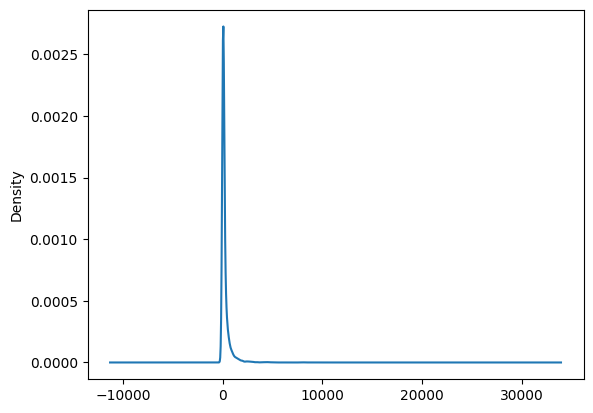

In [60]:
orders['Sales'].plot(kind='kde')

<Axes: >

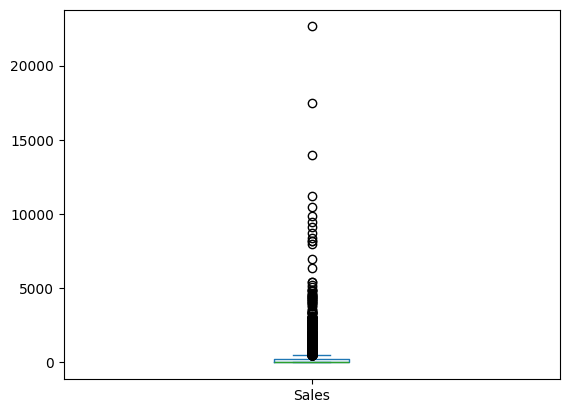

In [61]:
orders['Sales'].plot(kind='box')

## data distribution of profit

<Axes: ylabel='Frequency'>

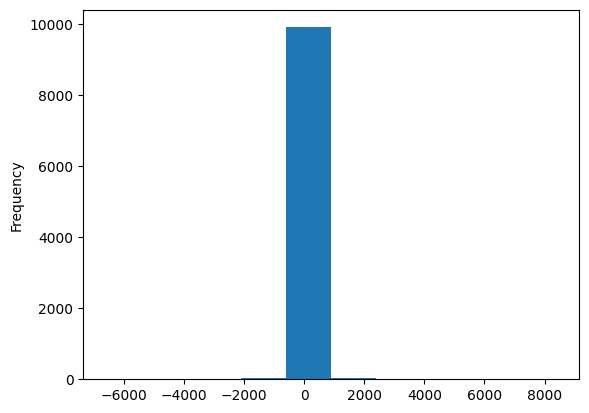

In [65]:
orders['Profit'].plot(kind='hist')

In [64]:
orders['Profit'].skew(), orders['Profit'].kurt()

(7.561431562468343, 397.1885145524141)

<Axes: ylabel='Density'>

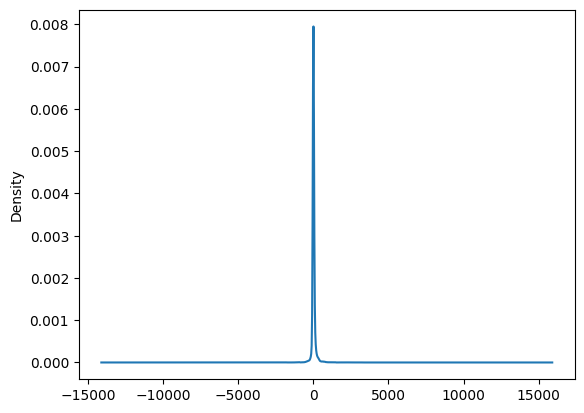

In [66]:
orders['Profit'].plot(kind='kde')

<Axes: >

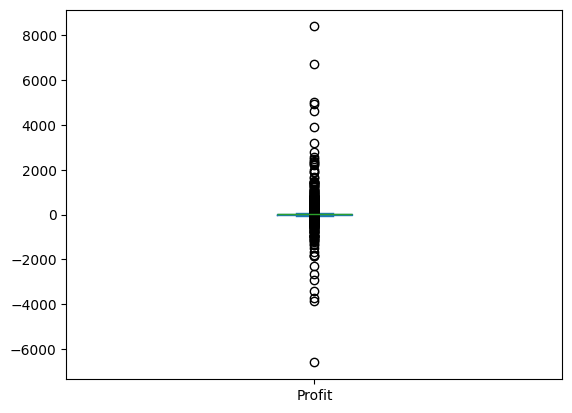

In [62]:
orders['Profit'].plot(kind='box')

In [67]:
orders['Profit'].describe()

,Profit
count,9994.000000
mean,28.656896
std,234.260108
min,-6599.978000
25%,1.728750
50%,8.666500
75%,29.364000
max,8399.976000


In [72]:
orders[orders['Profit']<0]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772
